In [2]:
!pip install nltk

  Obtaining dependency information for nltk from https://files.pythonhosted.org/packages/a6/0a/0d20d2c0f16be91b9fa32a77b76c60f9baf6eba419e5ef5deca17af9c582/nltk-3.8.1-py3-none-any.whl.metadata
  Obtaining dependency information for click from https://files.pythonhosted.org/packages/00/2e/d53fa4befbf2cfa713304affc7ca780ce4fc1fd8710527771b58311a3229/click-8.1.7-py3-none-any.whl.metadata
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.5 MB 3.0 MB/s eta 0:00:01
   --------- ------------------------------ 0.4/1.5 MB 4.6 MB/s eta 0:00:01
   -------------------- ------------------- 0.8/1.5 MB 6.2 MB/s eta 0:00:01
   ---------------------------------- ----- 1.3/1.5 MB 7.5 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 7.4 MB/s eta 0:00:00
Using cached click-8.1.7-py3-none-any.whl (97 kB)


ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'C:\\Python311\\Scripts\\nltk.exe' -> 'C:\\Python311\\Scripts\\nltk.exe.deleteme'


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string

In [4]:
yelp=pd.read_csv('dataset/yelp.csv')

In [5]:
yelp_class=yelp[(yelp['stars']==1)|(yelp['stars']==5)]
X = yelp_class['text']
y = yelp_class['stars']

In [7]:
set(y)

{1, 5}

In [8]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Praahas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [10]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [11]:
def text_process(text):
  no_punct=[char for char in text if char not in string.punctuation]
  no_punct = ''.join(no_punct).lower()
  no_punct=[word for word in no_punct.split() if word not in stopwords.words('english')]
  return no_punct

In [12]:
test_string="Hey there! This is a sample review, which happens to contain punctuations."
result=text_process(test_string)
print(result)

['hey', 'sample', 'review', 'happens', 'contain', 'punctuations']


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

              precision    recall  f1-score   support

           1       0.87      0.63      0.73       167
           5       0.91      0.98      0.94       651

    accuracy                           0.90       818
   macro avg       0.89      0.80      0.84       818
weighted avg       0.90      0.90      0.90       818

[[105  62]
 [ 16 635]]
0.9046454767726161


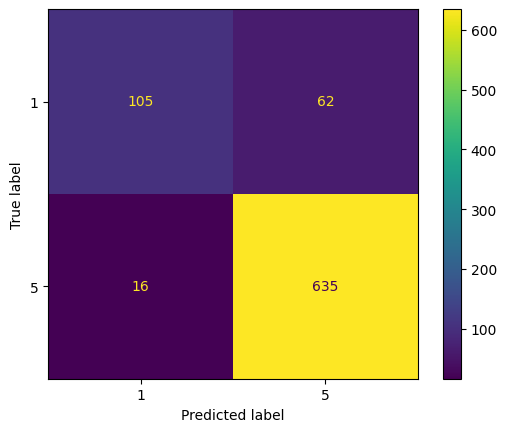

In [18]:
steps=[('vect',CountVectorizer(stop_words='english',lowercase=True)),('model',MultinomialNB())]
pipe=Pipeline(steps)
model=pipe.fit(X_train,y_train)
predictions=model.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,predictions)
print(classification_report(y_test,predictions))
print(cm)
print(accuracy_score(y_test,predictions))
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test)

In [19]:
positive_test_sample="Very good place with good food. Ambience is fantastic. The seafood sizzler is a must have!!!"
negative_test_sample="Pathetic Food. Service is worse than the food. The food was cold, and tasteless. I am never visiting this restaurant again!"

In [20]:
prediction=model.predict([negative_test_sample])
print(prediction)

[1]


In [21]:
prediction=model.predict([positive_test_sample])
print(prediction)

[5]
